Is home ownership becoming a less attainable goal?
    
As a group we are interested in housing in Central Florida and how, as the volume of housing increases, 
the rate of private ownership versus rental becomes inverse. 

Is home ownership becoming a less attainable goal?
 

In [1]:
%matplotlib inline
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


*Availability – As the overall volume of housing increases overtime, there are fewer homes available for purchase.
We expect the proportion of available rental homes will go up in comparison to the number of homes available for purchase. 
We expect that the large volume of housing is going to rental homes.

Our research question then is: 
       how has the proportion of available homes to rental homes changed over the last five years? 
        
We will examine this for Orange County, Florida.

In [2]:
# data manipulation

# Files to Load 
act_HistCt_file= os.path.join('..', 'resources','formatted - ActivList_HistCt.csv')
act_Summary_file= os.path.join('..', 'resources','formatted - miniSummary.csv')

# Read School and Student Data File and store into Pandas Data Frames
#note:  changed the column name from Month to Year; 
#Note: converted csv file to number - astype.float() wouldn't read last value in DF, numeric would not read last value in DF
#    better way would be most excellent
actHistCt_data = pd.read_csv(act_HistCt_file)
actSummary_data = pd.read_csv(act_Summary_file)


actSummary_data.head()

,Year,Property Type,yrTot_avail,yr_avg_avail,yrAvg_avail_all,yrTot_numSales,yrAvg_numSales,yrTot_spTrend,yrAvg_spTrend
0,2009,Private,NaN,NaN,NaN,NaN,NaN,1557195.0,129766.0
1,2010,Private,NaN,NaN,NaN,NaN,NaN,2819293.0,105175.0
2,2011,Private,NaN,NaN,NaN,NaN,NaN,2598148.0,111338.0
3,2012,Private,NaN,NaN,NaN,NaN,NaN,2824350.0,124025.0
4,2013,Private,NaN,NaN,NaN,18517.0,1543.0,3358988.0,155891.0


In [13]:
#trim years to 2014-2018
years=[int(2014), int(2015), int(2016), int(2017)]

#removes years not being measured
summaryAll = actSummary_data[actSummary_data["Year"].isin(years)]
#summaryAll = summaryAll.astype(float)

#ummaryAll = summaryAll.reset_index(drop=True)
summaryAll.head()

2014


,Year,Property Type,yrTot_avail,yr_avg_avail,yrAvg_avail_all,yrTot_numSales,yrAvg_numSales,yrTot_spTrend,yrAvg_spTrend
5,2014,Private,80137.0,6678.0,4094.92,15863.0,1322.0,3979052.0,175697.0
6,2015,Private,85971.0,7164.0,4188.83,21544.0,1795.0,4390349.0,190165.0
7,2016,Private,75308.0,6276.0,3763.17,21328.0,1777.0,4825235.0,211938.0
8,2017,Private,66236.0,5520.0,3400.46,21824.0,1819.0,5354151.0,234242.0
16,2014,Rental,18141.0,1512.0,NaN,9191.0,766.0,57154.0,2357.0


In [4]:
#summaryAll

In [83]:
#Data prep
#data separated by property type
rentalTotalData=summaryAll[summaryAll['Property Type']=='Rental']
privateTotalData=summaryAll[summaryAll['Property Type']=='Private']
allTotalData=summaryAll[summaryAll['Property Type']=='Both']
pAndR=summaryAll[summaryAll['Property Type']!='Both']

#merge dataframes
availHsg_DF = pd.merge(rentalTotalData,privateTotalData, on="Year")
availHsgDF = pd.merge(availHsg_DF,allTotalData, on="Year")


#rename columns
availHsgDF.rename(columns={
                           'yrTot_avail_x': 'Rental Housing Available', 
                           'yr_avg_avail_x':'Rental Housing Available Monthly Average',
                            'yrTot_avail_y': 'Private Housing Available', 
                           'yr_avg_avail_y':'Private Housing Available Monthly Average',
                           'yrTot_avail': 'Total Available Housing', 
                           'yr_avg_avail':'Total Available Housing Monthly Average',

                           'yrTot_numSales_x': 'Rentals Sales Number Total', 
                           'yrAvg_numSales_x':'Rental Sales Number Monthly Average',
                           'yrTot_numSales_y': 'Private Sales Number Total', 
                           'yrAvg_numSales_y':'Private Sales Number Monthly Average',
                           'yrTot_numSales': 'Housing Sales Number Total', 
                           'yrAvg_numSales_y':'Housing Sales Number Monthly Average',

                           'yrTot_spTrend_x': 'Rentals Sales Price Trend', 
                           'yrAvg_spTrend_x':'Rental Sales Price Trend Monthly Average',
                           'yrTot_spTrend_y': 'Sales Price Trend Total', 
                           'yrAvg_spTrend_y':'Private Sales Price Trend Monthly Average',
                           'yrTot_spTrend ': 'Sales Price Trend', 
                           'yrAvg_spTrend':'Total Sales Price Trend Monthly Average'
                         }, inplace=True)

#Drop duplicate columns
availHsgDF = availHsgDF.drop(columns=['Property Type_x', 'yrAvg_avail_all_x', 'Property Type_y', 
                                      'yrAvg_avail_all_y', 'Property Type', 'yrAvg_avail_all', 'yrAvg_numSales', 
                                      'yrTot_spTrend','Rental Housing Available Monthly Average', 'Private Housing Available Monthly Average'])


availHsgDF.head()

,Year,Rental Housing Available,Rentals Sales Number Total,Rental Sales Number Monthly Average,Rentals Sales Price Trend,Rental Sales Price Trend Monthly Average,Private Housing Available,Private Sales Number Total,Housing Sales Number Monthly Average,Sales Price Trend Total,Private Sales Price Trend Monthly Average,Total Available Housing,Total Available Housing Monthly Average,Housing Sales Number Total,Total Sales Price Trend Monthly Average
0,2014,18141.0,9191.0,766.0,57154.0,2357.0,80137.0,15863.0,1322.0,3979052.0,175697.0,98278.0,8190.0,25054.0,178054.0
1,2015,14561.0,8711.0,726.0,56901.0,2385.0,85971.0,21544.0,1795.0,4390349.0,190165.0,100532.0,8378.0,30255.0,192550.0
2,2016,15008.0,8540.0,712.0,57055.0,2370.0,75308.0,21328.0,1777.0,4825235.0,211938.0,90316.0,7526.0,29868.0,214307.0
3,2017,15375.0,8990.0,749.0,56868.0,2369.0,66236.0,21824.0,1819.0,5354151.0,234242.0,81611.0,6801.0,30814.0,236611.0


In [84]:
#Calculations

#availHsgDF['availPvR'] =['availPvR':'availHsgDFD', 'availPvRmn':'availHsgDFm','availPvRstd':'availHsgDFstd', 'availPvRsem''availHsgDFsem']
availHsgDF['availPvR'] =( availHsgDF['Private Housing Available'] - availHsgDF['Rental Housing Available'])

#can be used as data for conclusion
availHsgDF['availPvRavg']=( availHsgDF['Private Housing Available'] - availHsgDF['Rental Housing Available'])/2
availHsgDF['availPvRpc'] =availHsgDF['availPvR'].pct_change()

availHsgDF.head()

,Year,Rental Housing Available,Rentals Sales Number Total,Rental Sales Number Monthly Average,Rentals Sales Price Trend,Rental Sales Price Trend Monthly Average,Private Housing Available,Private Sales Number Total,Housing Sales Number Monthly Average,Sales Price Trend Total,Private Sales Price Trend Monthly Average,Total Available Housing,Total Available Housing Monthly Average,Housing Sales Number Total,Total Sales Price Trend Monthly Average,availPvR,availPvRavg,availPvRpc
0,2014,18141.0,9191.0,766.0,57154.0,2357.0,80137.0,15863.0,1322.0,3979052.0,175697.0,98278.0,8190.0,25054.0,178054.0,61996.0,30998.0,NaN
1,2015,14561.0,8711.0,726.0,56901.0,2385.0,85971.0,21544.0,1795.0,4390349.0,190165.0,100532.0,8378.0,30255.0,192550.0,71410.0,35705.0,0.151849
2,2016,15008.0,8540.0,712.0,57055.0,2370.0,75308.0,21328.0,1777.0,4825235.0,211938.0,90316.0,7526.0,29868.0,214307.0,60300.0,30150.0,-0.155580
3,2017,15375.0,8990.0,749.0,56868.0,2369.0,66236.0,21824.0,1819.0,5354151.0,234242.0,81611.0,6801.0,30814.0,236611.0,50861.0,25430.5,-0.156534


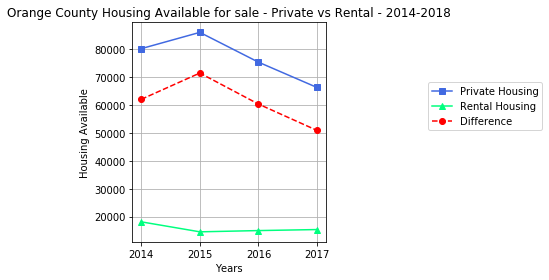

In [99]:
#prepare plot details

#x axis

x_axis=np.array(years)
#y axis
yRental=np.array(availHsgDF['Rental Housing Available'])
yPrivate=np.array(availHsgDF['Private Housing Available'])
yPvRDiff=np.array(availHsgDF['availPvR'])
yAll=np.array(availHsgDF['Total Available Housing'])

#Grid Formatting
tick_locations=x_axis
plt.xticks=(tick_locations)
plt.grid(which='major',axis='both')

plt.title('Orange County Housing Available for sale - Private vs Rental - 2014-2018')
plt.xlabel("Years")
plt.ylabel("Housing Available")

#plot
plt.plot(x_axis, yPrivate,marker='s', linestyle='solid', color='royalblue',  label='Private Housing')
plt.plot(x_axis, yRental,marker='^', linestyle='solid', color='springgreen',label='Rental Housing')
plt.plot(x_axis, yPvRDiff, marker='o', linestyle='dashed', color='Red', label='Difference')

#Save
plt.legend(bbox_to_anchor=(1.5, .75))
plt.tight_layout()
plt.savefig("../output/RentalVsPrivateLC.png")
plt.show()

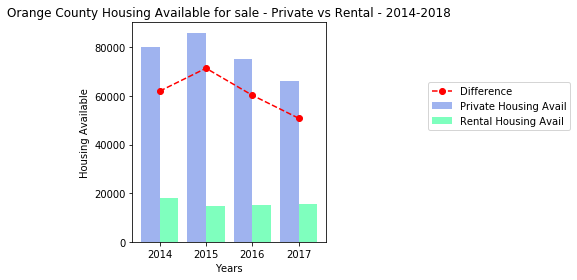

In [98]:
#Bar Chart - keep
#parameter settings
bar_width = .4
opacity = 0.5

#axis formatting
plt.title('Orange County Housing Available for sale - Private vs Rental - 2014-2018')
plt.xlabel("Years")
plt.ylabel("Housing Available")


#plot
plt.bar(years, yPrivate, -bar_width, align='edge',alpha=opacity, color='royalblue', label='Private Housing Avail')
plt.bar(years, yRental, bar_width, align='edge',alpha=opacity, color='springgreen', label='Rental Housing Avail')
plt.plot(x_axis, yPvRDiff, marker='o', linestyle='dashed', color='Red', label='Difference')

plt.legend(bbox_to_anchor=(1.5, .75))

#save
plt.tight_layout()
plt.savefig("../output/RentalVsPrivateBC.png")
plt.show()


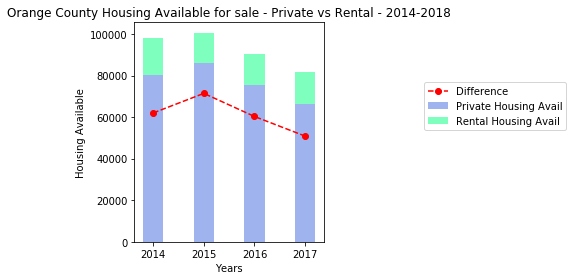

In [97]:
# stacked Bar Chart - keep
#parameter settings
bar_width = .4
opacity = 0.5

#axis formatting
plt.title('Orange County Housing Available for sale - Private vs Rental - 2014-2018')
plt.xlabel("Years")
plt.ylabel("Housing Available")

#plot
plt.bar(years, yPrivate, -bar_width, alpha=opacity, color='royalblue', label='Private Housing Avail')
plt.bar(years, yRental, bar_width, bottom=yPrivate,alpha=opacity, color='springgreen', label='Rental Housing Avail')
plt.plot(x_axis, yPvRDiff, marker='o', linestyle='dashed', color='Red', label='Difference')

plt.legend(bbox_to_anchor=(1.5, .75))

#save
plt.tight_layout()
plt.savefig("../output/RentalVsPrivateSBC.png")
plt.show()


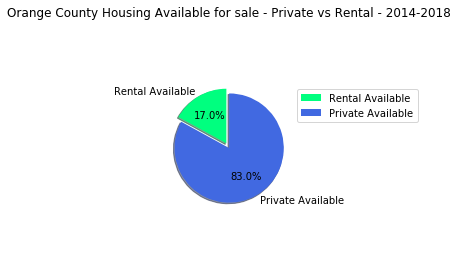

In [100]:
#Pie Chart - total of all
#Data
tRAvail=availHsgDF['Rental Housing Available'].sum()
tPAvail=availHsgDF['Private Housing Available'].sum()

#format
labels = 'Rental Available', 'Private Available'
sizes = [tRAvail, tPAvail]
explode = (0, 0.1)
tcolors=['springgreen','royalblue']

#plot
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=tcolors,autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
ax1.set(title='Orange County Housing Available for sale - Private vs Rental - 2014-2018')

plt.legend(bbox_to_anchor=(1.5, .75))

#save
plt.tight_layout()
plt.savefig("../output/AvailAllPC.png")
plt.show()


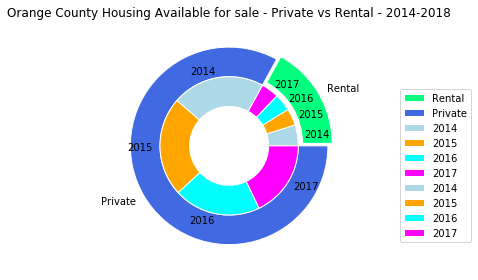

In [101]:
#nested Pie

#Data
availType = np.array([yRental, yPrivate])
availYrs = np.array(pAndR['yrTot_avail'])

#formatting
outerLabels=['Rental','Private']
innerLabels=[2014,2015,2016,2017,2014,2015,2016,2017]
explode=(.05, 0)

size = 0.3
#colors
outer_colors = ['springgreen','royalblue']
inner_colors = ['lightblue','orange','cyan','magenta']

#Plot
fig, ax = plt.subplots()
ax.pie(availType.sum(axis=1), explode=explode, labels=outerLabels,radius=1, colors=outer_colors, wedgeprops=dict(width=size, edgecolor='w'))
ax.pie(availType.flatten(), labels=innerLabels, radius=1-size, colors=inner_colors, wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Orange County Housing Available for sale - Private vs Rental - 2014-2018')

plt.legend(bbox_to_anchor=(1.5, .75))

#save
plt.tight_layout()
plt.savefig("../output/AvailNestedPC.png")
plt.show()

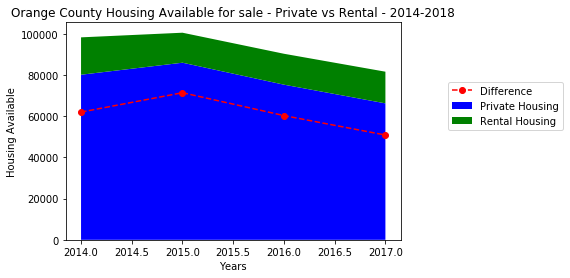

In [10]:
#Stacked Area Chart

plt.title('Orange County Housing Available for sale - Private vs Rental - 2014-2018')
plt.xlabel("Years")
plt.ylabel("Housing Available")
plt.xticks=x_axis


labels = ['Private Housing', 'Rental Housing']
colorsx=['blue', 'green']


plt.stackplot(x_axis,  yPrivate, yRental, colors=colorsx,labels=labels)
plt.plot(x_axis, yPvRDiff, marker='o', linestyle='dashed', color='Red', label='Difference')
plt.legend(bbox_to_anchor=(1.5, .75))
plt.savefig("../output/RentalVsPrivateSAC.png")
plt.show()


[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
 0.43758721 0.891773   0.96366276 0.38344152]


ValueError: c of shape (10,) not acceptable as a color sequence for x with size 4, y with size 4

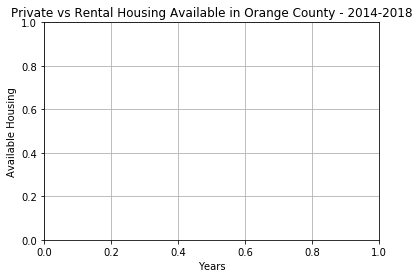

In [105]:
#WORK IN PROGRESS

#Scatter Plot
#define axis #(previously described axes:)
#x_axis
#x_axis=np.array(years)

#y_axis
#yRental=np.array(availHsgDF['Rental Housing Available'])
#yPrivate=np.array(availHsgDF['Private Housing Available'])

#Scatter formatting
rng = np.random.RandomState(0)
colors = rng.rand(10)
sizes = 100 * rng.rand(10)
print(colors)

#Grid Formatting
tick_locations=[value +5 for value in x_axis]
plt.xticks=(tick_locations)
plt.grid(which='major', axis='both')
plt.title("Private vs Rental Housing Available in Orange County - 2014-2018")
plt.xlabel("Years")
plt.ylabel("Available Housing")

#c of shape (10,) not acceptable as a color sequence for x with size 4, y with size 4

#plot latitude vs temperature
plt.scatter(x_axis, yRental, c=colors, s=sizes, alpha=0.3, cmap='viridis')
plt.scatter(x_axis, yPrivate, c=colors, s=sizes, alpha=0.5, cmap='viridis')
plt.colorbar()

#plt.legend(loc="upper left")
plt.legend(bbox_to_anchor=(1.5, .75))
          
# Save the Figure
plt.savefig("../output/RentalVsPrivateScattr.png")
plt.show()
